Autoencoders are great way to save and share the data efficiently rather than storing the raw version. In throey, the compressed representation holds the key information about an image and we can use it for denoising images or other kinds of recostruction and transformation!

In [5]:
import torch
import torchvision.transforms as transforms
import numpy as np
from torchvision import datasets

import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.MNIST(root = 'data', train=True, transform = transform, download = True)

test_data = datasets.MNIST(root = 'data', train=False, transform=transform, download=True)

In [20]:
num_workers = 0

batch_size = 20

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

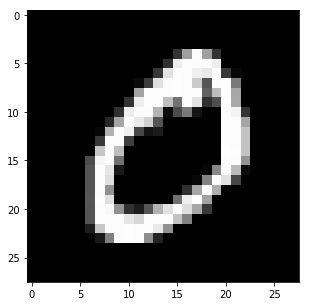

In [8]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

img = np.squeeze(images[1])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(img, cmap ='gray')

# Linear Autoencoder

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.fc1 = nn.Linear(28*28, encoding_dim)
        
        self.fc2 = nn.Linear(encoding_dim, 28*28)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        
        x = F.sigmoid(self.fc2(x))
        return x
    
encoding_dim = 32

model  = Autoencoder(encoding_dim)

print(model)

Autoencoder(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=784, bias=True)
)


In [12]:
#MSE is good to calculate pixel quantity rather than image probability
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)



In [17]:
n_epoch = 20

for i in range((n_epoch)):
    
    train_loss = 0.0
    
    for data in train_loader:
        
        images, labels = data
        
        #Flatten the image
        images = images.view(images.size(0), -1)
        
        optimizer.zero_grad()
        
        outputs = model.forward(images)
        
        loss = criterion(outputs, images)
        
        loss.backward()
        
        #Paramaeter update
        optimizer.step()
        
        #Update running training_loss 
        train_loss += loss.item() * images.size(0)
    # print avg training statistics
    train_loss = train_loss / len(train_loader)
    print('Epoch {} Traing Loss {}'.format(i, train_loss))
        
        

C:\Anaconda\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 0 Traing Loss 0.6366521579523882
Epoch 1 Traing Loss 0.3280134167770545
Epoch 2 Traing Loss 0.28325189722081023
Epoch 3 Traing Loss 0.2735842811129987
Epoch 4 Traing Loss 0.26952178683131933
Epoch 5 Traing Loss 0.26722083196043966
Epoch 6 Traing Loss 0.26571680765599015
Epoch 7 Traing Loss 0.26459476098418233
Epoch 8 Traing Loss 0.26369315564011536
Epoch 9 Traing Loss 0.26293627031768363
Epoch 10 Traing Loss 0.26225787229215103
Epoch 11 Traing Loss 0.26155150489881634
Epoch 12 Traing Loss 0.26096333337947725
Epoch 13 Traing Loss 0.26039588974788785
Epoch 14 Traing Loss 0.2599343586526811
Epoch 15 Traing Loss 0.2595155088727673
Epoch 16 Traing Loss 0.25910592343658206
Epoch 17 Traing Loss 0.25872693506690364
Epoch 18 Traing Loss 0.25837957550771534
Epoch 19 Traing Loss 0.2580527377563218


C:\Anaconda\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


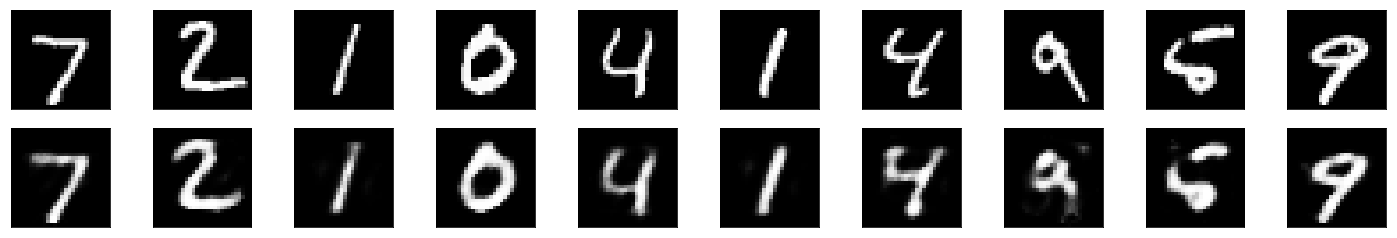

In [25]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

images_flatten = images.view(images.size(0), -1)

#Get sample output
output = model(images_flatten)

#Pre images for display
images = images.numpy()

#Output
output = output.view(batch_size, 1, 28, 28)

output = output.detach().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))


for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap = 'gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

